Grupo 7: 

Marcus Sampaio	1220101669

Pedro Henrique de Sousa Saldanha	1220101946

Luiz Roberto de Albuquerque Finizio Junior	1220108322

Igor de Araujo Cunha Costa 1220107625

link do dataset: https://www.kaggle.com/datasets/ulissescastro/brazil-clothing-marketplace-dataset

Link do github: https://github.com/deltaSDW/lab_anBigData


"Este trabalho apresenta um banco de dados com mais de 2200 itens de vestuário, extraídos do catálogo do maior site de compras e vendas online do Brasil, utilizando web scraping. O conjunto de dados limpo contém 2206 observações, divididas em 14 colunas. Os dados foram obtidos ao extrair informações do site em 15 de setembro de 2023."

# 1. Introdução:

Iremos separar as peças de roupas entre masculinas e femininas. Com isso, conseguiremos ter uma base para ver qual dos dois gêneros vende mais. A loja então poderá verificar quais as melhores opções para reabastecer o seu estoque, focando no gênero que vende mais, assim evitando gastos e aumentando os lucros da empresa.
- qual foi a temporada com mais vendas?
- qual o maior desconto em roupas, masculino ou feminino?
- quais roupas são mais compradas, masculinas ou femininas?

Segue embaixo à análise:

In [1]:
import pandas as pd

dataframes = []
dataframes.append(pd.read_excel("roupas.xlsx"))
tabela_total = pd.concat(dataframes, ignore_index=True)

display(tabela_total)

,Título,Preco_original,Desconto_percentual,Preco_com_desconto,n_vendidos_categoria,Marca,Material,Gênero,Temporada,Nota,N_Avaliações,Review1,Review2,Review3
0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,69.90,0.00,69.90,1000,TORONTO UNIFORMES PROFISSIONAIS,Poliéster,Sem gênero,NaN,4.0,273,"Preço justo , bem feito acabamento ok. Única s...","Tamanho bom, costuras de qualidade, porém teci...","Muito bom, só poderia ter os cortes na lateral..."
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,274.81,0.18,232.89,10000,Lupo,Algodão,Masculino,Outono/Inverno,4.5,3034,As cuecas são boas; porém você percebe na cost...,"Pelo preço promocional, com ctz tem algum defe...","Serviram muito bem, porém é nítido que o pano ..."
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,239.88,0.20,199.90,50000,Zorba,Algodão,Masculino,NaN,4.7,5682,O tecido é bom e são confortáveis. Só que a nu...,Vendo comentários de outros consumidores vejo ...,"Produto não é nem de longe original, tecido gr..."
3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,279.86,0.22,229.39,10000,Mash,Algodão,Masculino,Primavera/Verão,4.6,1700,"As cuecas são boas, porém meu marido usa g e p...","E o tamanho certo, mas em baixo dela, fica mui...",Produto não parece.\nOriginal e veio 2 modelos...
4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,140.83,0.09,129.20,1000,Menina Linda,Jean,Feminino,Primavera/Verão,4.4,507,Estou encantada com essas peças!.\nOs shorts s...,"Recomendo, tecido confortável, igual a foto.","Gostei muito dos shorts, material bom, para us..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,Bermuda Masculina Tática Thunder Poly Ripstop ...,131.78,0.10,119.80,5,Use Tático,Poliéster,Masculino,Primavera/Verão,4.3,3,Muito bom produto gostei muito.,Tá ótimo recomendo a todos.,NaN
2203,Camiseta Preta Juvenil Infantil Menina Menino ...,23.16,0.13,20.50,25,DestaQ,Algodão,Sem gênero infantil,NaN,NaN,0,NaN,NaN,NaN
2204,Blusa Personalizada Jaqueta Com Sua Marca Logo...,93.99,0.00,93.99,1,Inoffensive,NaN,Feminino,NaN,NaN,0,NaN,NaN,NaN
2205,Roupa Infantil Social Menino - Bebê Batizado F...,97.30,0.00,97.30,50,Balão Magico Kids,NaN,Bebês,NaN,4.7,14,"O roupa em si é linda, só a camisa que o tecid...",Amei.,Ficou perfeito no meu filho.


# 2. Manipulação de colunas

- Remoção das colunas "Review1", "Review2" e "Review3", no qual são apenas as análises dos clientes em relação ao produto.

In [2]:
tabela_total = tabela_total.drop(['Review1', 'Review2', 'Review3'], axis=1)

display(tabela_total)

,Título,Preco_original,Desconto_percentual,Preco_com_desconto,n_vendidos_categoria,Marca,Material,Gênero,Temporada,Nota,N_Avaliações
0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,69.90,0.00,69.90,1000,TORONTO UNIFORMES PROFISSIONAIS,Poliéster,Sem gênero,NaN,4.0,273
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,274.81,0.18,232.89,10000,Lupo,Algodão,Masculino,Outono/Inverno,4.5,3034
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,239.88,0.20,199.90,50000,Zorba,Algodão,Masculino,NaN,4.7,5682
3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,279.86,0.22,229.39,10000,Mash,Algodão,Masculino,Primavera/Verão,4.6,1700
4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,140.83,0.09,129.20,1000,Menina Linda,Jean,Feminino,Primavera/Verão,4.4,507
...,...,...,...,...,...,...,...,...,...,...,...
2202,Bermuda Masculina Tática Thunder Poly Ripstop ...,131.78,0.10,119.80,5,Use Tático,Poliéster,Masculino,Primavera/Verão,4.3,3
2203,Camiseta Preta Juvenil Infantil Menina Menino ...,23.16,0.13,20.50,25,DestaQ,Algodão,Sem gênero infantil,NaN,NaN,0
2204,Blusa Personalizada Jaqueta Com Sua Marca Logo...,93.99,0.00,93.99,1,Inoffensive,NaN,Feminino,NaN,NaN,0
2205,Roupa Infantil Social Menino - Bebê Batizado F...,97.30,0.00,97.30,50,Balão Magico Kids,NaN,Bebês,NaN,4.7,14


- Depois fizemos uma filtragem separando os demais itens entre masculino e feminino, pois queremos ver qual dos gêneros está dando mais lucro à loja.

In [3]:
produtos_masculinos = tabela_total[tabela_total['Gênero'] == 'Masculino']
produtos_femininos = tabela_total[tabela_total['Gênero'] == 'Feminino']

display(produtos_masculinos)
display(produtos_femininos)

,Título,Preco_original,Desconto_percentual,Preco_com_desconto,n_vendidos_categoria,Marca,Material,Gênero,Temporada,Nota,N_Avaliações
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,274.81,0.18,232.89,10000,Lupo,Algodão,Masculino,Outono/Inverno,4.5,3034
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,239.88,0.20,199.90,50000,Zorba,Algodão,Masculino,NaN,4.7,5682
3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,279.86,0.22,229.39,10000,Mash,Algodão,Masculino,Primavera/Verão,4.6,1700
6,Calça Jeans Levis 511 Original Slim Fit Elastano,339.00,0.00,339.00,100,Levi's,Algodao/Elastano,Masculino,Outono/Inverno,4.9,14
8,Calça Levis Jeans Masculina Tradicional Elasta...,309.00,0.00,309.00,500,Levi's,Algodão e Elastano,Masculino,Outono/Inverno,4.3,52
...,...,...,...,...,...,...,...,...,...,...,...
2179,Kit Família 3 Peças Short Tactel Moda Praia Ma...,119.99,0.00,119.99,4,Relaxado,Tactel,Masculino,Primavera/Verão,NaN,0
2182,Oferta Kit 8 Cuecas Lupo Boxer Algodão Masculi...,153.59,0.00,153.59,4,Lupo,Algodão Cotton,Masculino,Primavera-verão - Outono-Inverno,NaN,0
2195,Kit 3 Cuecas Low Rise Trunk Calvin Klein,302.27,0.26,239.90,100,Calvin Klein,Algodão,Masculino,Outono/Inverno,4.6,32
2201,Calça Levi´s 511 Slim Com Elastano Ref Lb5110018,318.90,0.00,318.90,100,Levi's,Algodão com elastano,Masculino,Outono/Inverno,4.5,14


,Título,Preco_original,Desconto_percentual,Preco_com_desconto,n_vendidos_categoria,Marca,Material,Gênero,Temporada,Nota,N_Avaliações
4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,140.83,0.09,129.20,1000,Menina Linda,Jean,Feminino,Primavera/Verão,4.4,507
14,Bermuda Feminina Puma Lemlem Bike,209.99,0.00,209.99,0,Puma,Poliamida,Feminino,Outono/Inverno,NaN,0
20,Kit 10 Short Jeans Feminino Com Cintura Alta A...,199.99,0.00,199.99,5,Stillger,Algodão,Feminino,Primavera/Verão,NaN,0
32,Kit Com 2 Shorts Feminino Básico Sem Costura L...,72.90,0.00,72.90,3,Lupo,Poliamida,Feminino,Primavera/Verão,NaN,0
40,Kit 3 Short Laço Cintura Alta Shortinho Curto ...,110.69,0.00,110.69,5,Outros,Bengaline,Feminino,Primavera/Verão,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
2190,"Roupa De Ballet Kit Meia , Sapatilha Rede E Fa...",59.97,0.00,59.97,100,Diversas,NaN,Feminino,NaN,5.0,22
2198,Kit 4 Bermudas Plusais Estampada Caminhada Ult...,117.58,0.11,105.93,25,Feminina Academia Atacado,Poliéster,Feminino,Primavera/Verão,2.3,4
2200,30 Plaquinha Organizador De Tamanho De Roupas ...,47.99,0.00,47.99,5,Divisoria ou Separador de Cabides,NaN,Feminino,NaN,NaN,0
2204,Blusa Personalizada Jaqueta Com Sua Marca Logo...,93.99,0.00,93.99,1,Inoffensive,NaN,Feminino,NaN,NaN,0


# 3. Cálculos de indicadores

In [4]:
media_preco_original_masculino = produtos_masculinos['Preco_original'].mean()
media_preco_com_desconto_masculino = produtos_masculinos['Preco_com_desconto'].mean()

media_preco_original_feminino = produtos_femininos['Preco_original'].mean()
media_preco_com_desconto_feminino = produtos_femininos['Preco_com_desconto'].mean()

print(media_preco_original_masculino)
print(media_preco_com_desconto_masculino)

print(media_preco_original_feminino)
print(media_preco_com_desconto_feminino)

146.73543119266054
134.47253211009175
100.71006915629323
94.45315352697097


975646
272739


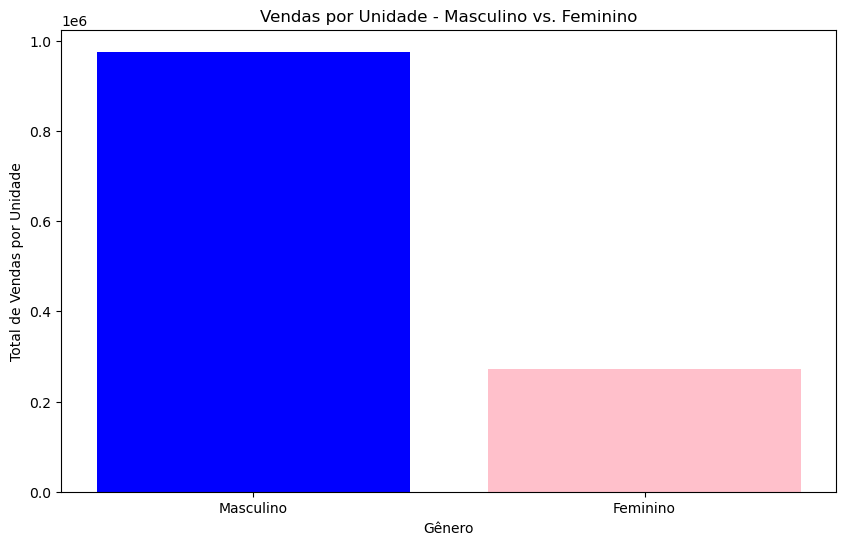

In [21]:
total_vendas_masculino = produtos_masculinos['n_vendidos_categoria'].sum()
total_vendas_feminino = produtos_femininos['n_vendidos_categoria'].sum()

print(total_vendas_masculino)
print(total_vendas_feminino)

plt.figure(figsize=(10, 6))
plt.bar(['Masculino', 'Feminino'], [total_vendas_masculino, total_vendas_feminino], color=['blue', 'pink'])
plt.title('Vendas por Unidade - Masculino vs. Feminino')
plt.xlabel('Gênero')
plt.ylabel('Total de Vendas por Unidade')
plt.show()

In [6]:
media_notas_masculino = produtos_masculinos['Nota'].mean()
media_notas_feminino = produtos_femininos['Nota'].mean()

print(media_notas_masculino)
print(media_notas_feminino)

4.552105263157894
4.5357873210633946


In [7]:
vendas_por_temporada = tabela_total.groupby('Temporada')['n_vendidos_categoria'].sum()

print(vendas_por_temporada)

Temporada
2021                                  8004
Outono-inverno                           5
Outono/Inverno                      162441
Primavera-verão                         25
Primavera-verão - Outono-Inverno     10304
Primavera-verão Outono-Inverno       10205
Primavera-verão Outono-inverno       27458
Primavera/Verão                     554605
Primavera/Verão Outono/Inverno         100
Primavera/Verão/Outono/Inverno        1035
Name: n_vendidos_categoria, dtype: int64


# 4. Análise da distribuição das amostras ou itens

- Foram realizadas 3 tipos de distruições dos dados, sendos elas:

    *Estatíscas sobre o Preço Original e Preço com Desconto
    
    *Gráfico de Disperção entre Preço Original e Preço com Desconto
    
    *Gráfico de Disperção entre Número de Avaliações e Nota do Produto

In [16]:
traducao_estatisticas = {
    'count': 'Contagem',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    '25%': 'Primeiro Quartil',
    '50%': 'Mediana',
    '75%': 'Terceiro Quartil',
    'max': 'Máximo'
}

estatisticas_preco_original = tabela_total['Preco_original'].describe().rename(traducao_estatisticas)

estatisticas_preco_desconto = tabela_total['Preco_com_desconto'].describe().rename(traducao_estatisticas)

print("Estatísticas para Preço Original:")
print(estatisticas_preco_original)

print("\nEstatísticas para Preço com Desconto:")
print(estatisticas_preco_desconto)

Estatísticas para Preço Original:
Contagem            2207.000000
Média                114.078777
Desvio Padrão         82.966115
Mínimo                 3.000000
Primeiro Quartil      54.900000
Mediana               88.950000
Terceiro Quartil     149.895000
Máximo               930.000000
Name: Preco_original, dtype: float64

Estatísticas para Preço com Desconto:
Contagem            2207.000000
Média                106.970476
Desvio Padrão         77.485552
Mínimo                 3.000000
Primeiro Quartil      52.325000
Mediana               79.900000
Terceiro Quartil     139.900000
Máximo               930.000000
Name: Preco_com_desconto, dtype: float64


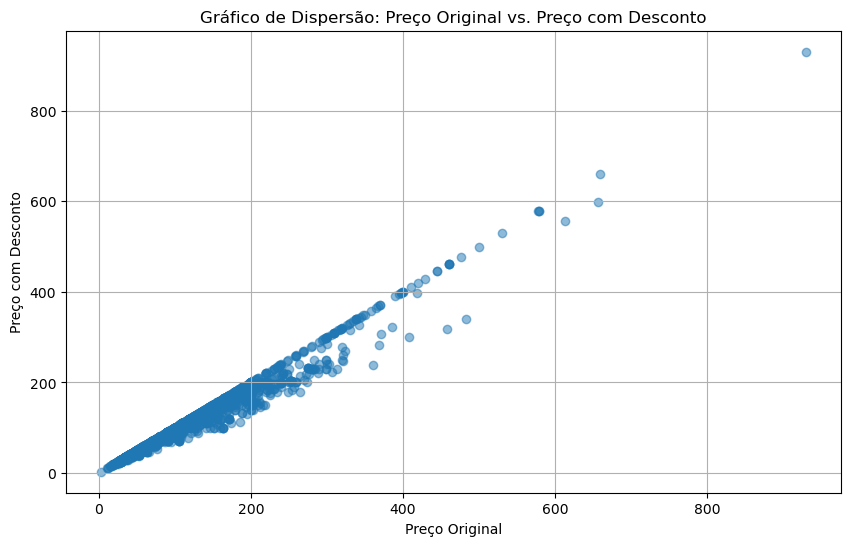

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(tabela_total['Preco_original'], tabela_total['Preco_com_desconto'], alpha=0.5)
plt.title('Gráfico de Dispersão: Preço Original vs. Preço com Desconto')
plt.xlabel('Preço Original')
plt.ylabel('Preço com Desconto')
plt.grid(True)
plt.show()

- Nesse Gráfico observamos que o Preço Original em relação ao Preco com Desconto, quase não há uma diferança muito significativa, o que cabe ao vender replanejar suas estratégias de desconto, pois quase não vale a pena o último.

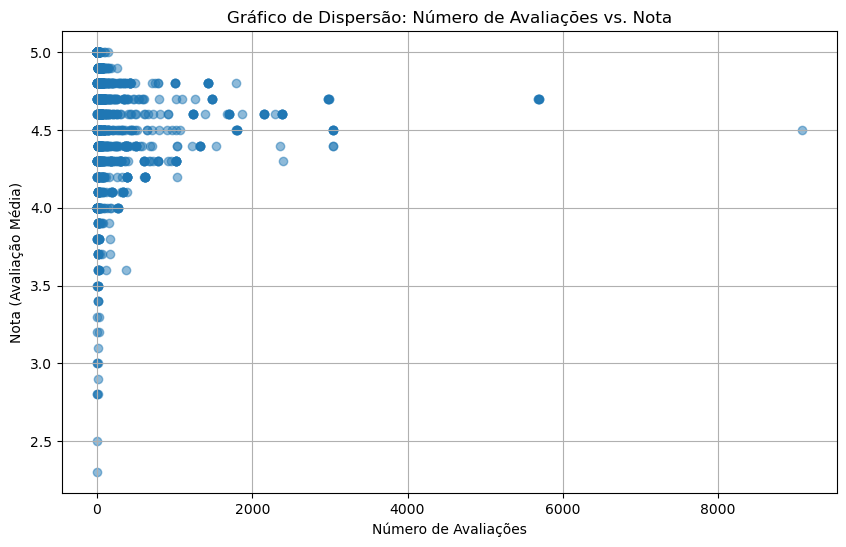

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(tabela_total['N_Avaliações'], tabela_total['Nota'], alpha=0.5)
plt.title('Gráfico de Dispersão: Número de Avaliações vs. Nota')
plt.xlabel('Número de Avaliações')
plt.ylabel('Nota (Avaliação Média)')
plt.grid(True)
plt.show()

# 5. Apresentação do Gráfico

- O grafico demostra um total de vendas por temporada. Após coletar informações sobre a venda dos produtos em relação á estação do ano, concluimos que entre a Primavera e o Verão são as épocas onde há mais vendas de produtos.

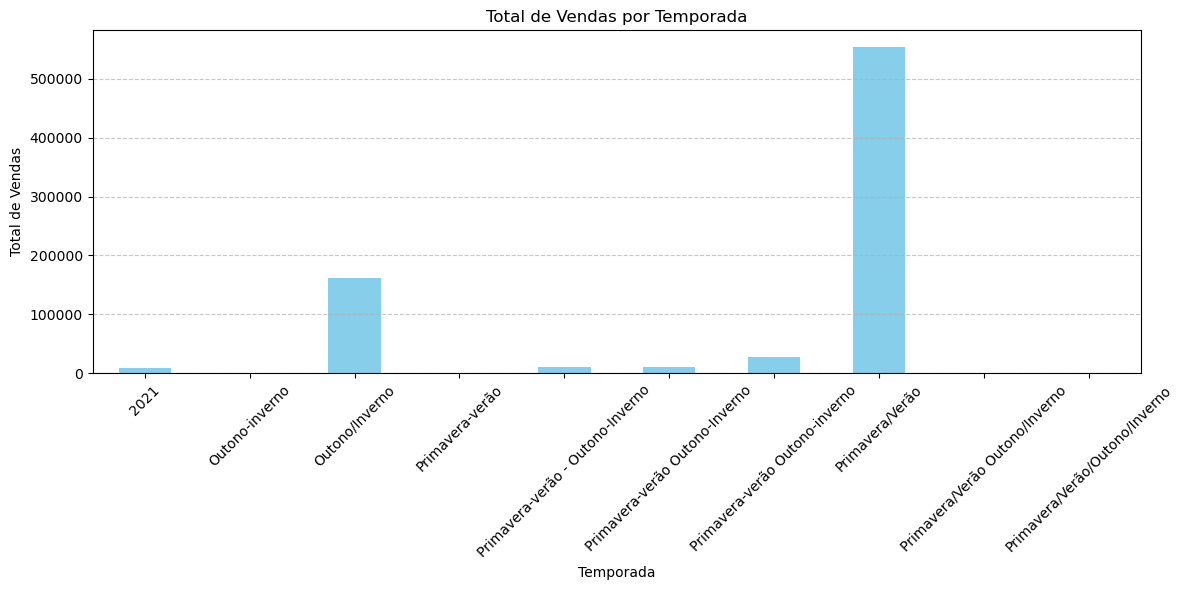

In [11]:
plt.figure(figsize=(12, 6))
vendas_por_temporada.plot(kind='bar', color='skyblue')
plt.title('Total de Vendas por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. Conclusão

Após uma análise detalhada dos dados, chegamos à conclusão de que a temporada de vendas de roupas em 2021 foi marcada por um sucesso notável, com um total de 975.646 peças masculinas e 272.739 peças femininas vendidas. Um ponto de destaque é o impressionante aumento nas vendas de roupas masculinas durante essa temporada.

Essa notável diferença nos números de vendas pode ser atribuída principalmente às estações da primavera e verão. Essas épocas do ano provavelmente foram responsáveis por atrair um grande número de consumidores, uma vez que muitas pessoas aproveitam as férias para fazer compras e, consequentemente, acabam adquirindo mais peças de vestuário.

Com todas essas informações em mãos, o proprietário da loja está bem posicionado para traçar um caminho mais estratégico e eficaz para a próxima temporada. Isso inclui um investimento mais significativo na promoção e estoque de roupas masculinas, dado o seu desempenho excepcional em 2021. Essa abordagem permitirá que ele evite gastos desnecessários, maximize o retorno sobre o investimento e, consequentemente, aumente seus lucros.

Além disso, o dono da loja também pode considerar a realização de campanhas de marketing específicas para a primavera e o verão, aproveitando o pico de demanda nesses períodos. Isso pode incluir a promoção de itens sazonais, cores e estilos populares durante essas estações, a fim de atrair ainda mais clientes.

Em resumo, a análise dos dados de vendas oferece uma base sólida para a tomada de decisões estratégicas, e o foco na primavera e nas roupas masculinas pode ser a chave para o sucesso nas próximas temporadas de vendas da loja. 